## 1.8. stemness score

In this notebook the "stem score" is analyzed. Or in other words, each cell in the dataset is scored for the expression of genes that mark stemness. The list of genes come from the publication by Giladi et al. in 2018 (https://doi.org/10.1038/s41556-018-0121-4). Besides the stemness score we also score the cells for the combined expression of two interferon receptors (Ifnar1 and Ifnar2). These figures are part of figure 1 and supp. figure 1 in our manuscript.

In [1]:
### loading python libraries

# standard libraries
import numpy as np
import pandas as pd

# single cell libraries
import anndata as ad
import scanpy as sc
sc.settings.verbosity = 0 

# plotting libraries
from matplotlib import pyplot as plt
plt.rcParams['pdf.fonttype'] = 42 #for saving PDF with changeable text
plt.rcParams['ps.fonttype'] = 42 #for saving PDF with changeable text

# other 
import warnings
warnings.filterwarnings('ignore') #ignore filter warnings
import sklearn as sk #used for L2 normalization
import sklearn.preprocessing #used for L2 normalization

# import own functions
from plotting import *

### Load data

Here, the filtered HSPC dataset (as filtered in notebook 1.3) is loaded and processed. A list of stemness genes that will use for scoring is also loaded into the notebook.

In [2]:
### load Anndata object with the HSPC dataset (all four subsets incl.)
adata_path = "../data/count_matrices/all_filtered.h5ad"
adata = sc.read_h5ad(adata_path)

In [3]:
### L2 normalize dataset
adata.X = sk.preprocessing.normalize(adata.X, norm='l2')

In [4]:
### scale dataset
sc.pp.scale(adata)

In [5]:
### load stemness markers
genelist = pd.read_excel("../data/gene_lists/gene_markers_Giladi_2018.xlsx")
genelist.gene = [str(genename).partition(";")[0] for genename in genelist.gene.values]
stemness_genes = genelist[genelist["gene module"]=="Stem genes"].gene.values

### Score cells for stemness
Here, we use the Scanpy built-in tool "score_genes" to score each gene for the average expression of the set of stemness markers. For more information see: https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.score_genes.html

In [6]:
### score all cells for stemness
sc.tl.score_genes(adata, stemness_genes, score_name="stemness")

In [7]:
### get minimum and maximum found stemness
max_value = adata.obs["stemness"].max()
min_value = adata.obs["stemness"].min()

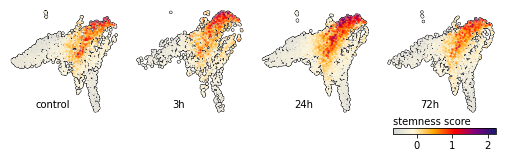

In [8]:
plot_UMAP_per_timepoint(
    adata, 
    "stemness", 
    min_value=min_value, 
    max_value=max_value,
    var_label="stemness score", 
    save=True, 
    time_key="time",
    save_path="../figures/1.8.stemness_score_UMAP_per_timepoint.pdf")

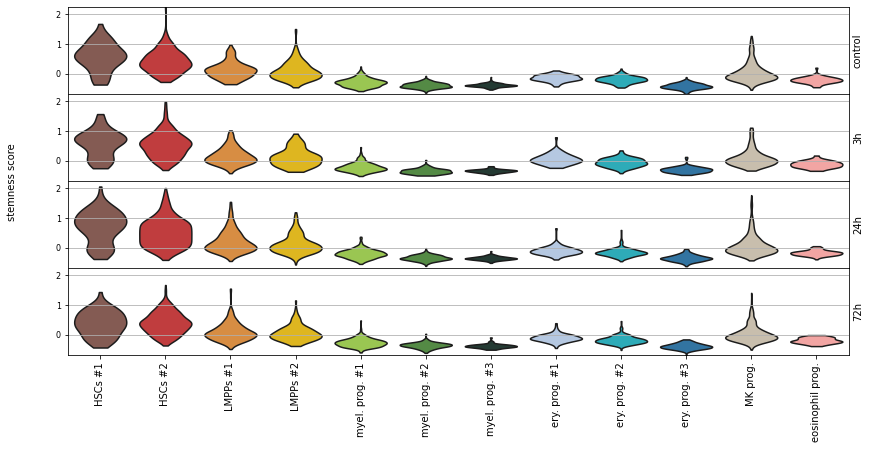

In [9]:
### plot stemness score per cluster for each cluster (violinplot)
times = adata.obs["time"].cat.categories

fig, axs = plt.subplots(len(times), 1, figsize=(14,1.6*len(times)), gridspec_kw={'wspace':0.1, 'hspace':0})

for i in range(len(times)):
    sc.pl.violin(adata[adata.obs["time"] == times[i]], "stemness", groupby="clusters", ax=axs[int(i)], jitter=0.4, show=False, ylabel=times[i], rotation=90, stripplot=False)

for ax in axs.flat:
    ax.get_xaxis().set_visible(False)
    ax.tick_params(axis='y', which='major', labelsize=8)
    ax.tick_params(axis='y', which='minor', labelsize=8)
    ax.set_ylim(min_value, max_value)
    ax.yaxis.set_label_position("right")
    ax.grid(axis='y')

fig.text(0.065, 0.5, 'stemness score', va='center', rotation='vertical')    
    
axs[len(times)-1].get_xaxis().set_visible(True)

# save figure
save_path = "../figures/1.8.stemness_score_violinplot_timepoints_clusters.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()

### Score cells for expression of interferon receptors
Here, we use the Scanpy built-in tool "score_genes" to score each gene for the average expression of the two interferon receptors. For more information see: https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.score_genes.html

In [10]:
### score all cells for Ifnar expression
ifnar_genes = ['Ifnar2', 'Ifnar1']
sc.tl.score_genes(adata, ifnar_genes, score_name="ifnar_score")

In [11]:
### get minimum and maximum found Ifnar expression
max_value = adata.obs["ifnar_score"].max()
min_value = adata.obs["ifnar_score"].min()

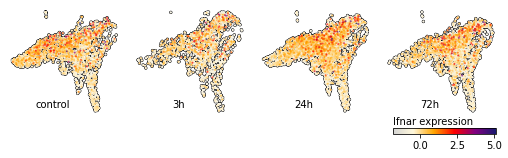

In [12]:
plot_UMAP_per_timepoint(
    adata, 
    "ifnar_score", 
    min_value=min_value, 
    max_value=max_value,
    var_label="Ifnar expression", 
    save=True, 
    time_key="time",
    save_path="../figures/1.8.ifnar_score_UMAP_per_timepoint.pdf")

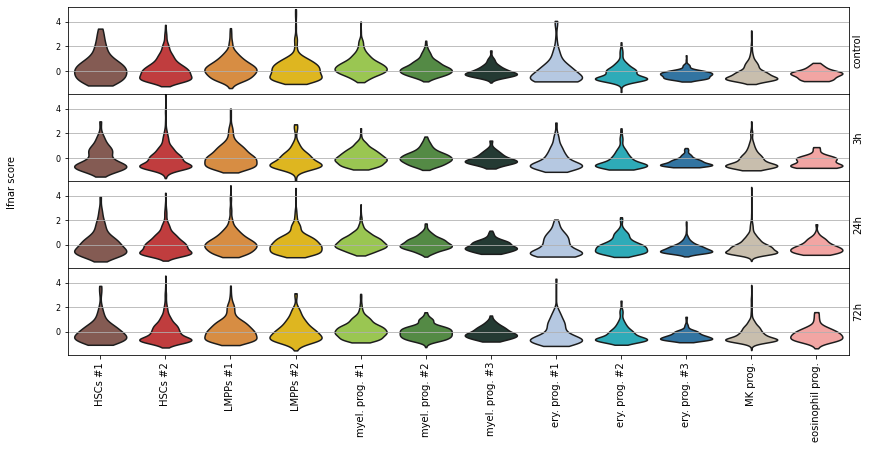

In [13]:
### plot stemness score per cluster for each cluster (violinplot)
times = adata.obs["time"].cat.categories

fig, axs = plt.subplots(len(times), 1, figsize=(14,1.6*len(times)), gridspec_kw={'wspace':0.1, 'hspace':0})

for i in range(len(times)):
    sc.pl.violin(adata[adata.obs["time"] == times[i]], "ifnar_score", groupby="clusters", ax=axs[int(i)], jitter=0.4, show=False, ylabel=times[i], rotation=90, stripplot=False)

for ax in axs.flat:
    ax.get_xaxis().set_visible(False)
    ax.tick_params(axis='y', which='major', labelsize=8)
    ax.tick_params(axis='y', which='minor', labelsize=8)
    ax.set_ylim(min_value, max_value)
    ax.yaxis.set_label_position("right")
    ax.grid(axis='y')

fig.text(0.065, 0.5, 'Ifnar score', va='center', rotation='vertical')    
    
axs[len(times)-1].get_xaxis().set_visible(True)

# save figure
save_path = "../figures/1.8.ifnar_score_violinplot_timepoints_clusters.pdf"
fig.savefig(save_path, bbox_inches='tight', format='pdf', dpi=300)

plt.show()